In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import psycopg2


In [4]:
def query_db(query):
    '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the
    same
    '''
    host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
    port = 5439
    db = 'interview'
    username = 'dsguest'
    password = 'nX9EFYUZ5Yu#0q'
    conn = psycopg2.connect(host=host, port=port, dbname=db, user=username,
    password=password)
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()

    rows = pd.DataFrame(rows)
    return rows


In [5]:
# Example usage:
print(query_db("SELECT count(1) FROM public.three_one_one;"))

          0
0  21351116


In [7]:
num_rows = 10 ** 6

1000000

In [10]:
data = query_db(f'SELECT * FROM public.three_one_one limit {num_rows};')

In [11]:
len(data)

1000000

In [14]:
col_names = [
    'unique_key',
    'created_date',
    'closed_date',
    'agency',
    'agency_name',
    'complaint_type',
    'descriptor',
    'location_type',
    'incident_zip',
    'incident_address',
    'street_name',
    'cross_street_1',
    'cross_street_2',
    'intersection_street_1',
    'intersection_street_2',
    'address_type',
    'city',
    'landmark',
    'facility_type',
    'status',
    'due_date',
    'resolution_description',
    'resolution_action_updated_date',
    'community_board',
    'bbl',
    'borough',
    'x_coordinate_state_plane',
    'y_coordinate_state_plane',
    'open_data_channel_type',
    'park_facility_name',
    'park_borough',
    'vehicle_type',
    'taxi_company_borough',
    'taxi_pick_up_location',
    'bridge_highway_name',
    'bridge_highway_direction',
    'road_ramp',
    'bridge_highway_segment',
    'latitude',
    'longitude',
    'location'
]

In [15]:
data.columns = col_names

In [16]:
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,15629899,2010-01-01,2010-01-16,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
1,15630099,2010-01-01,2010-01-01,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,...,,,,,,,,40.888997384527580,-73.83619209216230,"(40.88899738452758, -73.8361920921623)"
2,15630315,2010-01-01,2010-01-16,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
3,15634732,2010-01-01,2010-01-26,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10451.0,815 GERARD AVENUE,...,,,,,,,,40.825862900483810,-73.92591342884603,"(40.82586290048381, -73.92591342884603)"
4,15634748,2010-01-01,2010-01-04,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10460.0,441 MORRIS PARK AVENUE,...,,,,,,,,40.840322813358750,-73.87320792413288,"(40.84032281335875, -73.87320792413288)"


# There are a lot of junk complaint types

In [70]:
q = ''' 
SELECT
  complaint_type,
  COUNT(*) AS count
FROM
  public.three_one_one
GROUP BY
  complaint_type
ORDER BY count DESC;'''
compl_df = query_db(q)
compl_df

,0,1
0,Noise - Residential,1722501
1,HEAT/HOT WATER,1149728
2,Street Condition,939603
3,Street Light Condition,891730
4,HEATING,887869
5,Blocked Driveway,867920
6,Illegal Parking,839945
7,PLUMBING,701818
8,Water System,630164
9,GENERAL CONSTRUCTION,500863


<IPython.core.display.Javascript object>


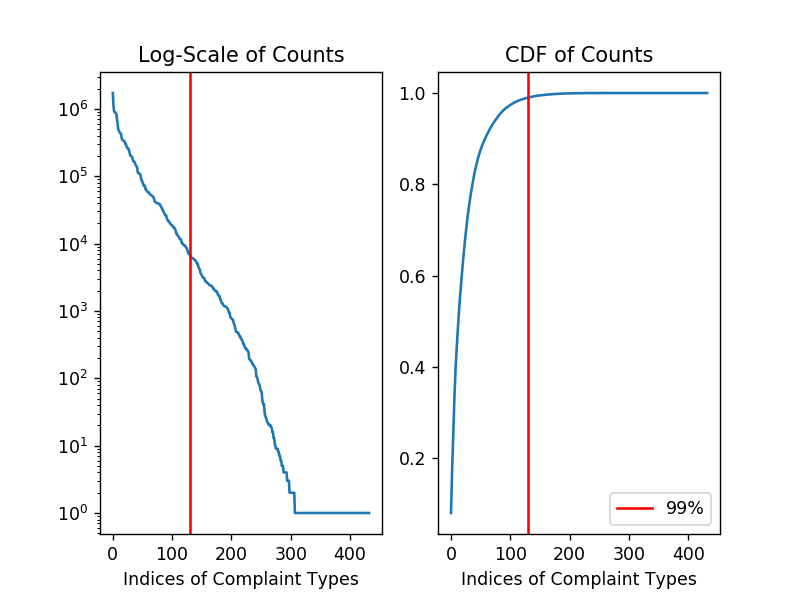

In [71]:
cdf = np.cumsum(compl_df[1].values) / np.sum(compl_df[1].values)
loc = np.where(cdf > .99)[0]
idx_cutoff = loc[0]
figure()
subplot(121)
semilogy(compl_df[1].values)
title('Log-Scale of Counts')
xlabel('Indices of Complaint Types')
axvline(x=idx_cutoff, color='r')

subplot(122)
plot(cdf)
title('CDF of Counts')
xlabel('Indices of Complaint Types')
axvline(x=idx_cutoff, color='r', label='99%')
legend()

In [123]:
complaint_types = list(compl_df[0].values[0:idx_cutoff])
sorted_types = list(compl_df[0].values[0:idx_cutoff])
sorted_types.sort()
sorted_types

['APPLIANCE',
 'Abandoned Vehicle',
 'Air Quality',
 'Animal Abuse',
 'Animal in a Park',
 'Asbestos',
 'BEST/Site Safety',
 'Benefit Card Replacement',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Broken Muni Meter',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Construction',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Curb Condition',
 'DCA / DOH New License Application Request',
 'DHS Advantage - Tenant',
 'DHS Advantage -Landlord/Broker',
 'DOF Parking - Payment Issue',
 'DOF Parking - Request Copy',
 'DOF Parking - Request Status',
 'DOF Property - Owner Issue',
 'DOF Property - Payment Issue',
 'DOF Property - Reduction Issue',
 'DOF Property - Request Copy',
 'DOF Property - Update Account',
 'DOOR/WINDOW',
 'DPR Internal',
 'Damaged Tree',
 'Dead Tree',
 'Dead/Dying Tree',
 'Derelict Bicycle',
 'Derelict Vehicle',
 'Derelict Vehicles',
 'Dirty Conditions',
 'Drinking',
 'ELECTRIC',
 'Electrical

# Incidents Per Year

In [104]:
q = f''' 
SELECT
  EXTRACT(YEAR FROM created_date) as yr,
  COUNT(*) AS count
FROM
  public.three_one_one
GROUP BY
  yr
ORDER BY yr DESC;'''

yr_df = query_db(q)

<IPython.core.display.Javascript object>


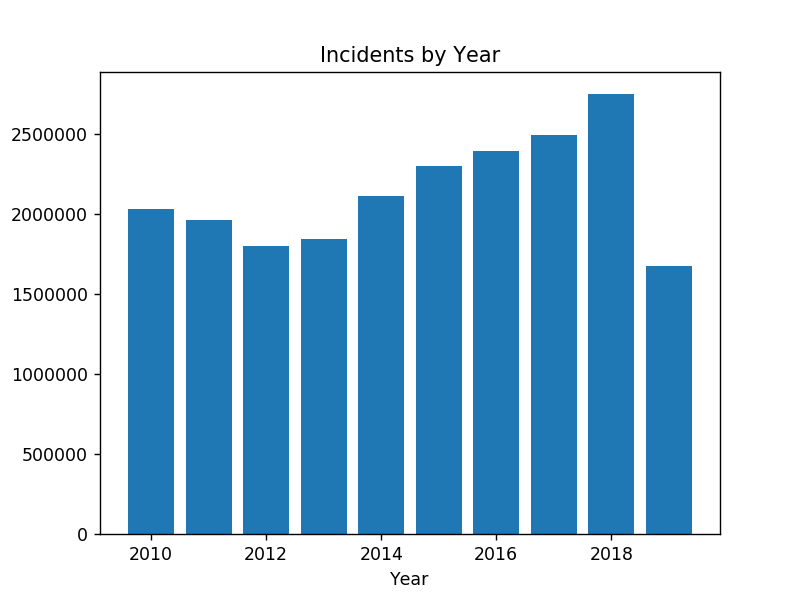

Text(0, 0.5, 'Number of Incidents')

In [105]:
figure()
bar(yr_df[0].values, yr_df[1].values)
title('Incidents by Year')
xlabel('Year')
ylabel('Number of Incidents')

# Is 2019 a low incident year, or is it due to missing data?
###  If all complaints come in at the end of the year, that could explain the drop

In [112]:
q = f''' 
SELECT
  EXTRACT(YEAR FROM created_date) as yr,
  CAST(CAST(yr AS varchar) + '-12-14' AS DATETIME) as deadline,
  COUNT(*) AS count
FROM
  public.three_one_one
WHERE created_date <= deadline
GROUP BY
  yr
ORDER BY yr DESC;'''

yr_deadline_df = query_db(q)

<IPython.core.display.Javascript object>


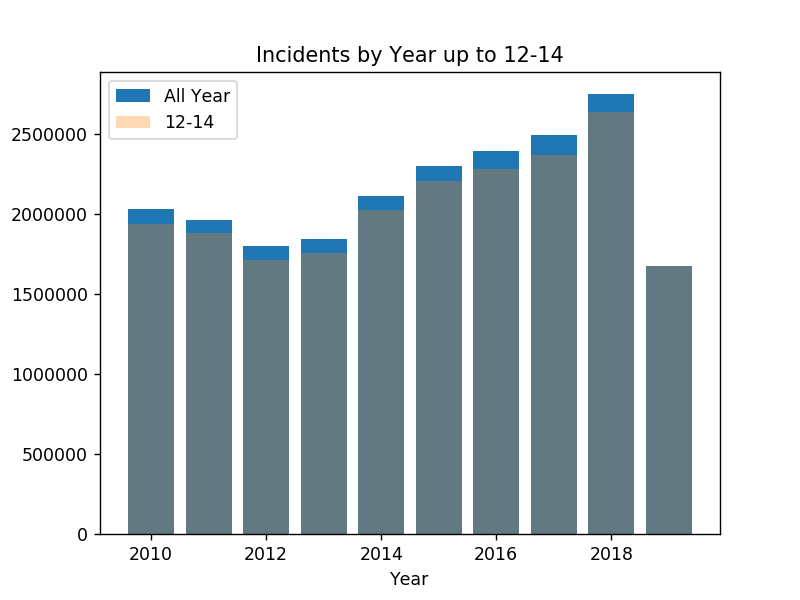

In [108]:
figure()
bar(yr_df[0].values, yr_df[1].values, label='All Year')
bar(yr_deadline_df[0].values, yr_deadline_df[2].values, alpha=0.3, label='12-14')
title('Incidents by Year up to 12-14')
xlabel('Year')
ylabel('Number of Incidents')
legend()

# What about each complaint category over time?
### Was there a decrease in one or two major complaint types due to implementing new policies, finishing construction, etc?

In [118]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
results = []
for y in years:
    q = f''' 
    SELECT
      complaint_type,
      COUNT(*) AS count
    FROM
      public.three_one_one
    WHERE complaint_Type in ({", ".join("'" + str(x) + "'" for x in complaint_types)})
    AND EXTRACT(YEAR FROM created_date) = {y}
    GROUP BY
      complaint_type
    ORDER BY count DESC;'''

    results.append(query_db(q))

In [119]:
len(results)

10

<IPython.core.display.Javascript object>


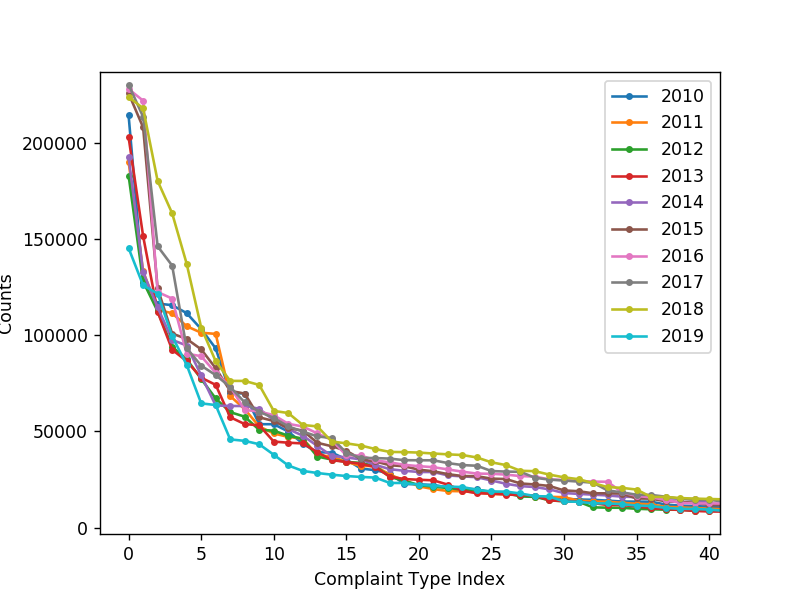

Text(0.5, 0, 'Complaint Type Index')

In [126]:
figure()
for i in range(10):
    plot(results[i][1].values, label=years[i], marker='.')
legend()
ylabel('Counts')
xlabel('Complaint Type Index')

# 2019 is down through out all the major complaint types from 2018
Possible questions to explore :
- Complaint System became more complicated to report
- State instituted complaint filtering policy
- Legislation to change what constitutes a violation